ANALIDIS DE DATOS - EDA

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
playtime_genre = pd.read_csv("DATA FUNCIONES/PlayTimeGenre.csv")

In [17]:
playtime_genre

,Genero,Año_Lanzamiento,playtime_forever
0,Action,1983,3582
1,Action,1984,384
2,Action,1988,16243
3,Action,1989,607
4,Action,1990,5
...,...,...,...
314,Web Publishing,2012,1947406
315,Web Publishing,2013,140060
316,Web Publishing,2015,332496
317,Web Publishing,2016,1


In [18]:
user_for_genre = pd.read_csv("DATA FUNCIONES/UserForGenre.csv")

In [19]:
user_for_genre

,Genero,Año_Lanzamiento,Id_User,Horas_Jugadas
0,Action,1983,76561197997129113,40
1,Action,1983,76561198006449409,78
2,Action,1983,76561198007478325,47
3,Action,1983,76561198009435936,0
4,Action,1983,76561198025071276,41
...,...,...,...,...
2948441,Web Publishing,2017,Eosoforcus,58
2948442,Web Publishing,2017,N47H4NI3L,1635
2948443,Web Publishing,2017,dirklah,796
2948444,Web Publishing,2017,kushziller,251


In [20]:
users_recommend = pd.read_csv("DATA FUNCIONES/UsersRecommend.csv")

In [21]:
users_recommend

,Año,Juego,Recomendaciones
0,2010,Amnesia: The Dark Descent,1
1,2010,ArcaniA,1
2,2010,Audiosurf,1
3,2010,Chime,1
4,2010,Counter-Strike: Source,2
...,...,...,...
3948,2015,resident evil 4 / biohazard 4,1
3949,2015,sZone-Online,2
3950,2015,the static speaks my name,9
3951,2015,theHunter,13


In [22]:
users_no_recommend = pd.read_csv("DATA FUNCIONES/UsersNoRecommend.csv")

In [23]:
users_no_recommend

,Año,Juego,Recomendaciones
0,2011,And Yet It Moves,2
1,2011,Dead Island,1
2,2011,Fable III,1
3,2011,Men of War: Vietnam,1
4,2012,Call of Duty: Black Ops II,1
...,...,...,...
936,2015,Zombie Army Trilogy,2
937,2015,Zombie Zoeds,1
938,2015,bit Dungeon II,1
939,2015,sZone-Online,1


In [24]:
sentiment_analysis = pd.read_csv("DATA FUNCIONES/Sentiment_Analysis.csv")

In [25]:
sentiment_analysis

,Año_Lanzamiento,sentiment_analysis,Registros
0,1989,2,1
1,1991,2,1
2,1992,2,2
3,1993,0,1
4,1993,2,2
...,...,...,...
69,2016,1,134
70,2016,2,558
71,2017,0,259
72,2017,1,335


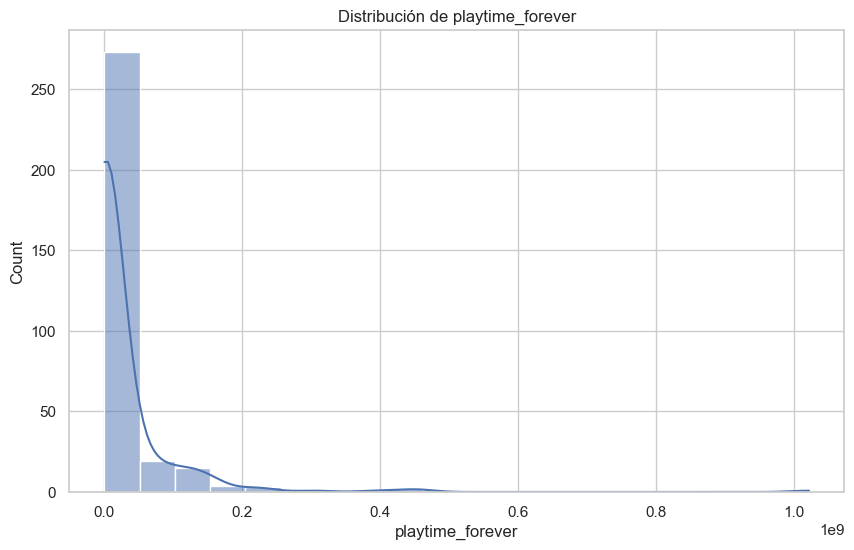

In [26]:
#Visualización de datos Play Time Forever

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización
sns.set(style="whitegrid")

# Visualizar la distribución de playtime_forever
plt.figure(figsize=(10, 6))
sns.histplot(playtime_genre["playtime_forever"], bins=20, kde=True)
plt.title("Distribución de playtime_forever")
plt.show()

La gráfica es un histograma con una curva de densidad (kde) superpuesta. Se usa la variable que estás analizando es "playtime_forever", y la distribución de esta variable se está representando en el eje x. Cada barra en el histograma muestra la frecuencia de los datos en un intervalo específico. La curva de densidad (kde) proporciona una representación suavizada de la distribución general de los datos. Con esta visualización, se puede tener una idea de la concentración de los valores de "playtime_forever" y cómo se distribuyen en el conjunto de datos. 

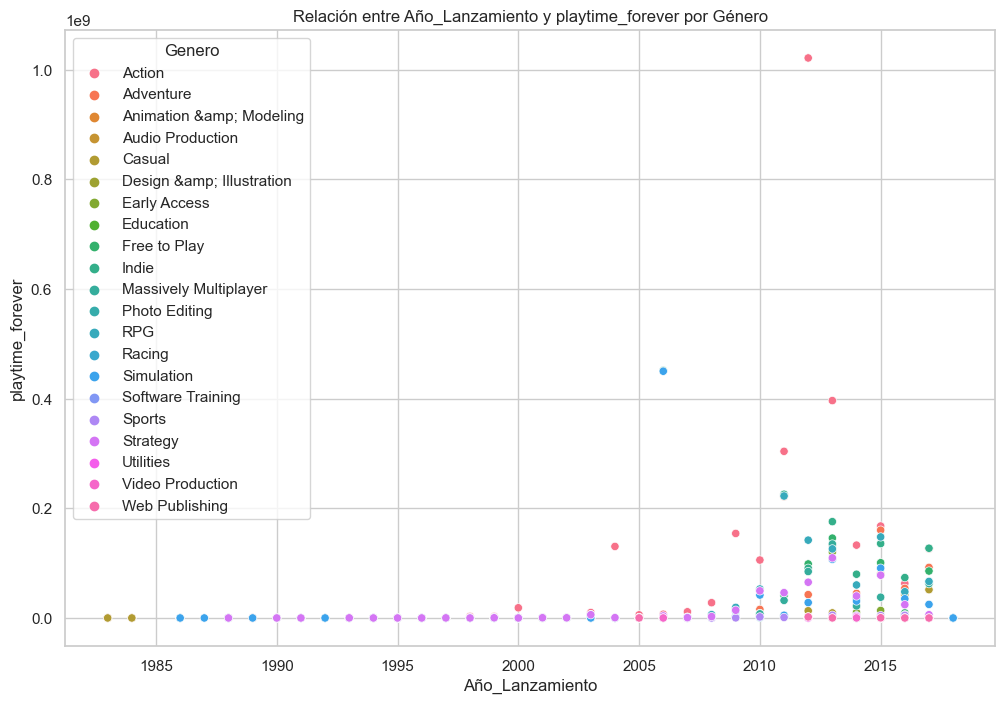

In [27]:
# Visualizacion de relaciones entre variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Año_Lanzamiento", y="playtime_forever", hue="Genero", data=playtime_genre)
plt.title("Relación entre Año_Lanzamiento y playtime_forever por Género")
plt.show()

La gráfica Diagrama de Dispersion permite visualizar la relación entre el año de lanzamiento de los juegos
("Año_Lanzamiento") y el tiempo de juego acumulado ("playtime_forever"). 
La codificación de colores por género permite identificar fácilmente cómo se distribuyen estas relaciones 
para los diferentes géneros de juegos. 
Esto permite observar patrones, tendencias o cualquier correlación aparente entre estas variables, por ejemplo durante los 
años 90 al 2000 no hay tanta variacion de generos.

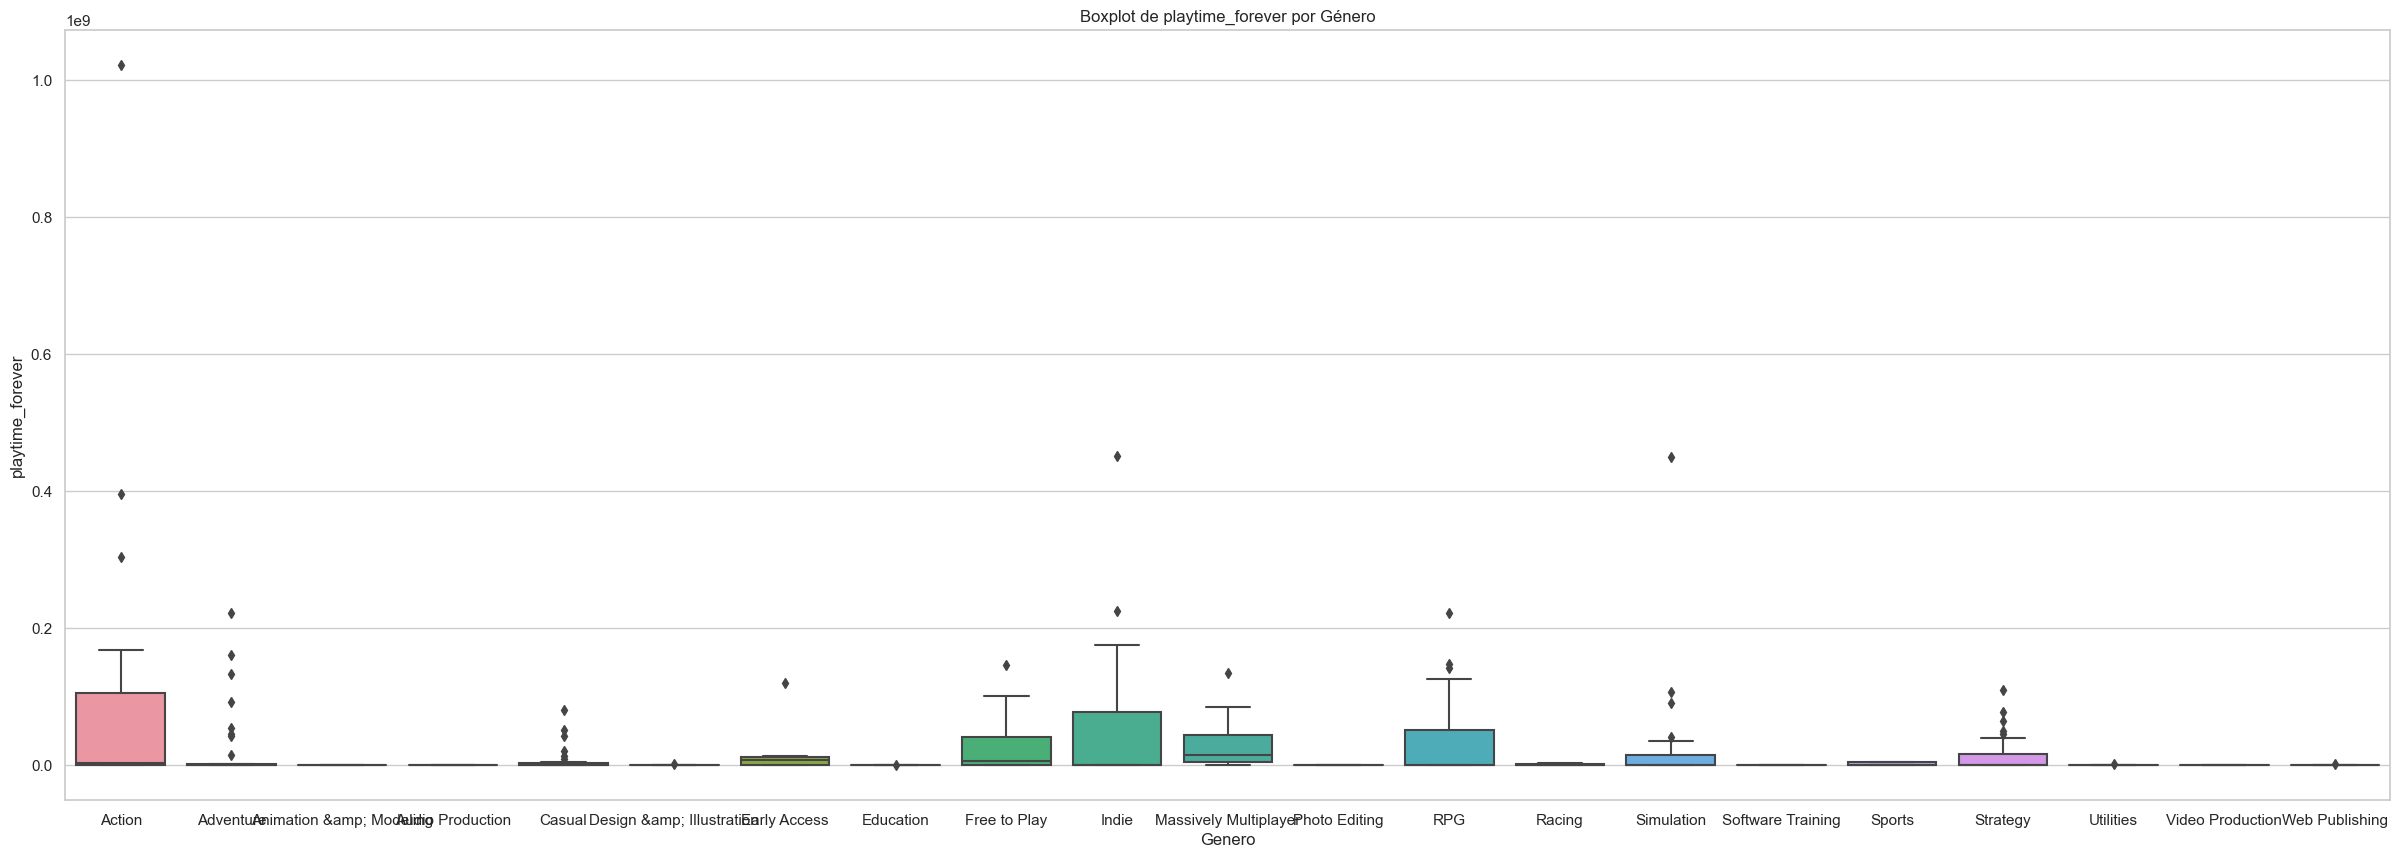

In [28]:
# Boxplot para detectar outliers en playtime_forever
plt.figure(figsize=(30, 10))
sns.boxplot(x="Genero", y="playtime_forever", data=playtime_genre)
plt.title("Boxplot de playtime_forever por Género")
plt.show()

El boxplot permite visualizar la distribución del tiempo de juego acumulado para diferentes géneros de juegos. Cada caja muestra la mediana, los cuartiles y, potencialmente, los valores atípicos en la distribución del tiempo de juego para un género específico. Esto nos permite identificar diferencias en la dispersión y la presencia de valores atípicos entre los géneros de juegos, como se puede observar los outliers en el genero Action.

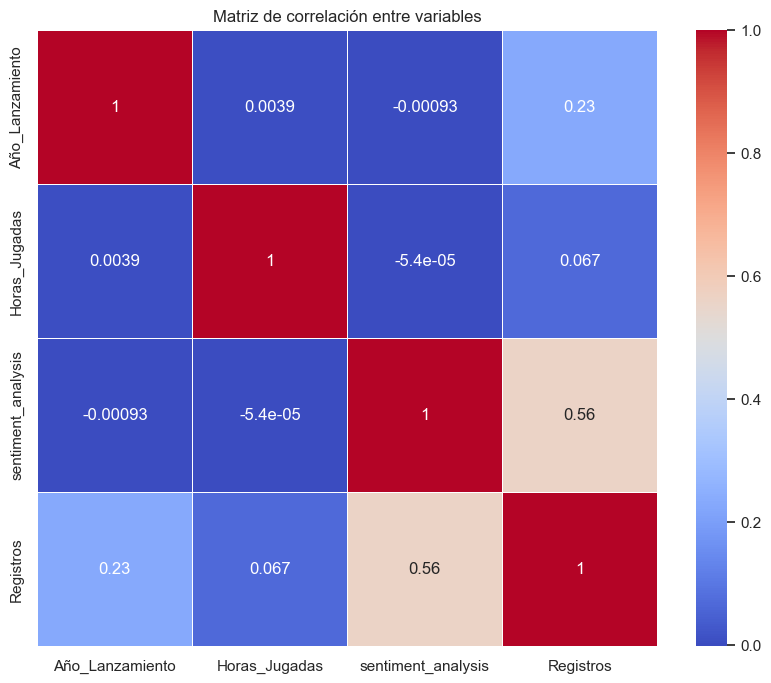

In [46]:
# Análisis de correlación

# Verificar y convertir tipos de datos
user_for_genre['Horas_Jugadas'] = pd.to_numeric(user_for_genre['Horas_Jugadas'], errors='coerce')

# Eliminar columnas no numéricas
non_numeric_columns = user_for_genre.select_dtypes(['object']).columns
user_for_genre = user_for_genre.drop(columns=non_numeric_columns)

# Concatenar DataFrames relevantes
merged_df = pd.merge(user_for_genre, sentiment_analysis, on="Año_Lanzamiento")

# Calcular matriz de correlación
correlation_matrix = merged_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de correlación entre variables")
plt.show()

La gráfica que se muestra es un mapa de calor que visualiza la matriz de correlación entre las variables numéricas en el DataFrame combinado. Proporciona información sobre cómo las diferentes variables se relacionan entre sí y puede ser útil para identificar patrones o dependencias en los datos.

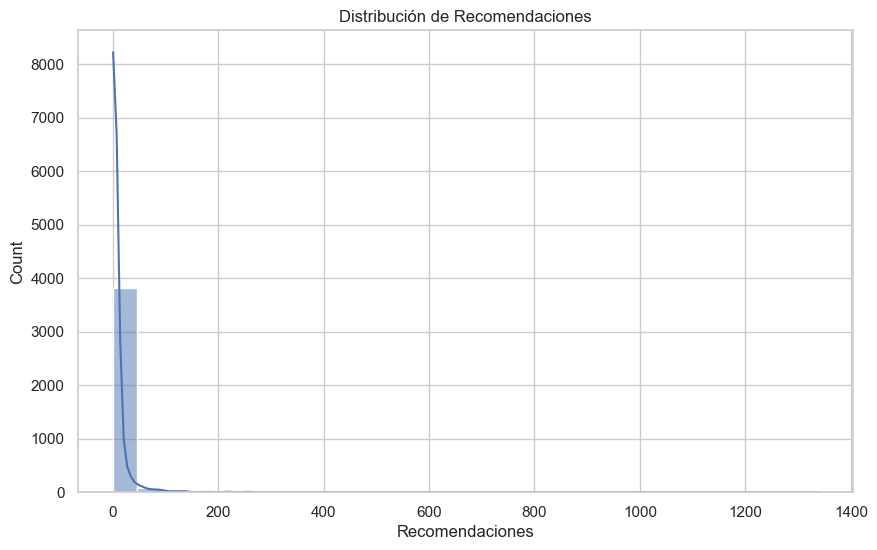

In [33]:
# Visualización de la distribución de Recomendaciones UsersRecommend
plt.figure(figsize=(10, 6))
sns.histplot(users_recommend['Recomendaciones'], bins=30, kde=True)
plt.title('Distribución de Recomendaciones')
plt.show()

La gráfica representa la distribución de los valores en la columna 'Recomendaciones'. Cada barra en el histograma muestra la frecuencia de los datos en un intervalo específico de recomendaciones, y la curva suavizada (kde) proporciona una representación suavizada de la forma general de la distribución. Esto permite visualizar cómo se distribuyen las recomendaciones en el conjunto de datos y obtener una idea de la concentración de valores en diferentes rangos.

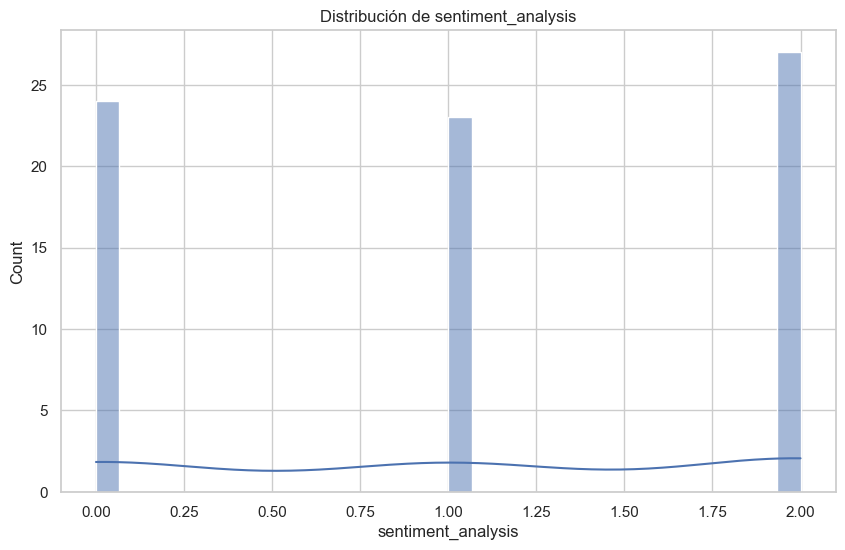

In [34]:
# Visualización de la distribución de sentiment_analysis
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_analysis['sentiment_analysis'], bins=30, kde=True)
plt.title('Distribución de sentiment_analysis')
plt.show()

La gráfica representa la distribución de los valores en la columna 'sentiment_analysis'. Cada barra en el histograma muestra la frecuencia de los datos en un intervalo específico de valores de análisis de sentimiento (0,1 Y 2), y la curva suavizada (kde) proporciona una representación suavizada de la forma general de la distribución. Esto permite visualizar cómo se distribuyen las puntuaciones de análisis de sentimiento en el conjunto de datos y obtener una idea de la concentración de valores en diferentes rangos.

In [35]:
# Estadísticas descriptivas
descriptive_stats = playtime_genre.describe()
print("Estadísticas descriptivas:")
print(descriptive_stats)

Estadísticas descriptivas:
       Año_Lanzamiento  playtime_forever
count       319.000000      3.190000e+02
mean       2005.601881      2.625033e+07
std           9.185448      8.182920e+07
min        1983.000000      0.000000e+00
25%        1999.000000      6.794500e+03
50%        2007.000000      1.871440e+05
75%        2014.000000      7.536445e+06
max        2018.000000      1.021504e+09


Con las estadisticas descriptivas vemos el Conteo (count): El número de observaciones no nulas para cada columna, Media (mean): La media aritmética, Desviación estándar (std): La medida de dispersión de los datos, Valor mínimo (min): El valor más pequeño en la columna, Percentil 25 (25%): El valor por debajo del cual cae el 25% de los datos, Mediana (50%): El valor que se encuentra en la mitad de los datos cuando estos se ordenan de menor a mayor, Percentil 75 (75%): El valor por debajo del cual cae el 75% de los datos, Valor máximo (max): El valor más grande en la columna.


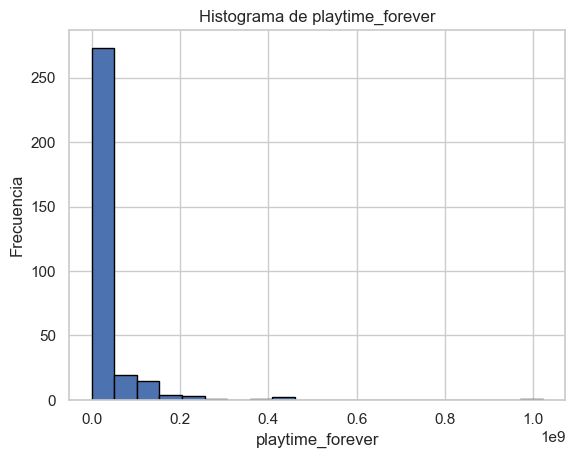

In [37]:
# Histograma
playtime_genre['playtime_forever'].plot.hist(bins=20, edgecolor='black')
plt.title('Histograma de playtime_forever')
plt.xlabel('playtime_forever')
plt.ylabel('Frecuencia')
plt.show()

La gráfica es un histograma que representa la distribución de la variable 'playtime_forever'. Cada barra en el histograma muestra la frecuencia de los datos en un intervalo específico de valores de 'playtime_forever'. Esta visualización permite entender cómo están distribuidos los tiempos de juego acumulados en el conjunto de datos y obtener una idea de la concentración de valores en diferentes rangos.

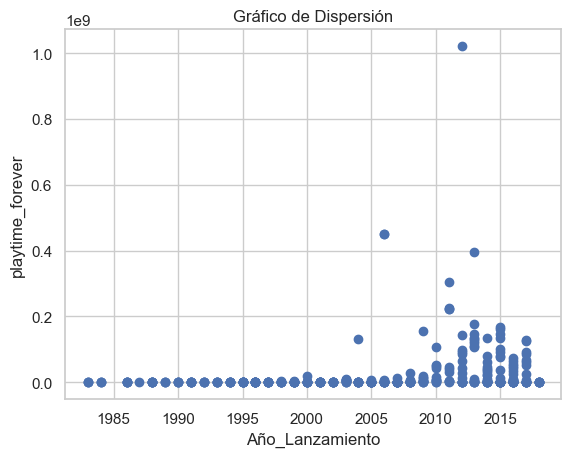

In [38]:
# Gráfico de dispersión
plt.scatter(playtime_genre['Año_Lanzamiento'], playtime_genre['playtime_forever'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Año_Lanzamiento')
plt.ylabel('playtime_forever')
plt.show()

El gráfico de dispersión permite visualizar la relación o patrón entre los años de lanzamiento ('Año_Lanzamiento') y los tiempos de juego acumulados ('playtime_forever'). Cada punto en el gráfico representa un juego, y su posición en los ejes muestra cómo se relacionan estas dos variables. Si los puntos se agrupan en alguna forma específica, podría indicar una tendencia o patrón en los datos. Por ejemplo vemos tendencia desde el año 2010 en adelante.

In [40]:
# Agrupación de datos
grouped_data = playtime_genre.groupby('Genero')['playtime_forever'].mean()
print("\nAgrupación de datos por género:")
print(grouped_data)


Agrupación de datos por género:
Genero
Action                       8.152479e+07
Adventure                    2.263598e+07
Animation &amp; Modeling     9.389275e+04
Audio Production             2.347633e+04
Casual                       7.864841e+06
Design &amp; Illustration    6.035205e+05
Early Access                 2.161713e+07
Education                    3.725660e+04
Free to Play                 3.161163e+07
Indie                        5.295682e+07
Massively Multiplayer        3.295016e+07
Photo Editing                4.146667e+02
RPG                          3.460438e+07
Racing                       7.861107e+05
Simulation                   2.589485e+07
Software Training            1.155150e+04
Sports                       1.731041e+06
Strategy                     1.599570e+07
Utilities                    4.189500e+05
Video Production             6.484375e+04
Web Publishing               4.205872e+05
Name: playtime_forever, dtype: float64


Se busca agrupar los datos en el DataFrame playtime_genre por la columna 'Genero' y calcular la media de 'playtime_forever' para cada género. La salida proporciona la información resumida de la media de tiempo de juego acumulado para cada categoría de género. Esto puede ser útil para entender cómo varía el tiempo de juego promedio entre diferentes géneros de juegos.

In [41]:
# Utilizo 'user_for_genre'

# Estadísticas descriptivas
descriptive_stats = user_for_genre.describe(include='all')  # Incluye estadísticas para columnas no numéricas
print("Estadísticas descriptivas:")
print(descriptive_stats)

Estadísticas descriptivas:
       Año_Lanzamiento  Horas_Jugadas
count     2.948446e+06   2.948446e+06
mean      2.011899e+03   2.840091e+03
std       4.399421e+00   9.812105e+03
min       1.983000e+03   0.000000e+00
25%       2.010000e+03   2.300000e+01
50%       2.013000e+03   3.240000e+02
75%       2.015000e+03   1.814000e+03
max       2.018000e+03   7.750870e+05


Este código es útil para obtener un resumen rápido de las características estadísticas de todas las columnas en el DataFrame user_for_genre. Puede proporcionar información valiosa sobre la distribución de datos y resaltar posibles problemas, como valores faltantes o variabilidad en las variables no numéricas.

In [42]:
# Correlación
correlation_matrix = user_for_genre.corr()
print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                 Año_Lanzamiento  Horas_Jugadas
Año_Lanzamiento         1.000000       0.008916
Horas_Jugadas           0.008916       1.000000


La matriz de correlación proporciona información sobre la relación lineal entre las variables numéricas en el DataFrame. Por ejemplo, el coeficiente de correlación entre 'Año_Lanzamiento' y 'Horas_Jugadas' es aproximadamente 0.008916. Este valor cercano a cero indica una correlación muy débil o prácticamente inexistente entre estas dos variables en el conjunto de datos.